In [55]:
    # importing libraries
    import h5py
    import scipy.io as io
    import PIL.Image as Image
    import numpy as np
    import os
    import glob
    from matplotlib import pyplot as plt
    from scipy.ndimage import gaussian_filter
    import scipy
    import json
    from matplotlib import cm as CM
    from image import *
    from model import CSRNet
    import torch
    from tqdm import tqdm
    %matplotlib inline

In [56]:
# function to create density maps for images
def gaussian_filter_density(gt):
    print (gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print ('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print ('done.')
    return density

In [57]:
part_A_train = os.path.join('part_A_final/train_data','images')
part_A_test = os.path.join('part_A_final/test_data','images')
part_B_train = os.path.join('part_B_final/train_data','images')
part_B_test = os.path.join('part_B_final/test_data','images')
path_sets = [part_A_train,part_A_test]

In [10]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [54]:
img_path

'part_B_final/test_data\\images\\IMG_5.jpg'

In [52]:
img_paths

[]

In [12]:
for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

part_A_final/train_data\images\IMG_1.jpg
(768, 1024)
generate density...


C:\Users\abhishekgupta.AD\AppData\Local\Temp\ipykernel_22516\4212836471.py:24: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')


done.
part_A_final/train_data\images\IMG_3.jpg
(664, 1000)
generate density...
done.
part_A_final/train_data\images\IMG_4.jpg
(746, 1024)
generate density...
done.
part_A_final/train_data\images\IMG_5.jpg
(683, 1024)
generate density...
done.
part_A_final/test_data\images\IMG_1.jpg
(704, 1024)
generate density...
done.
part_A_final/test_data\images\IMG_2.jpg
(684, 1024)
generate density...
done.
part_A_final/test_data\images\IMG_3.jpg
(427, 640)
generate density...
done.
part_A_final/test_data\images\IMG_4.jpg
(334, 500)
generate density...
done.
part_A_final/test_data\images\IMG_5.jpg
(768, 1024)
generate density...
done.


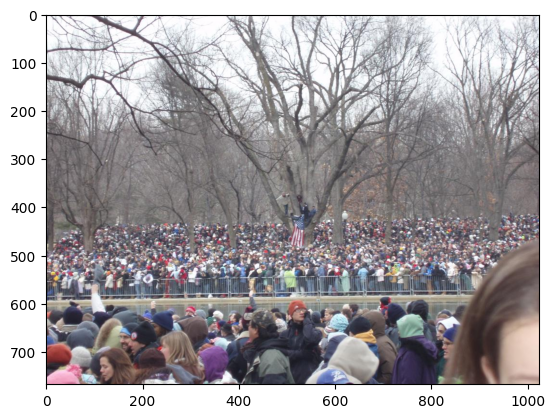

In [13]:
plt.imshow(Image.open(img_paths[0]))

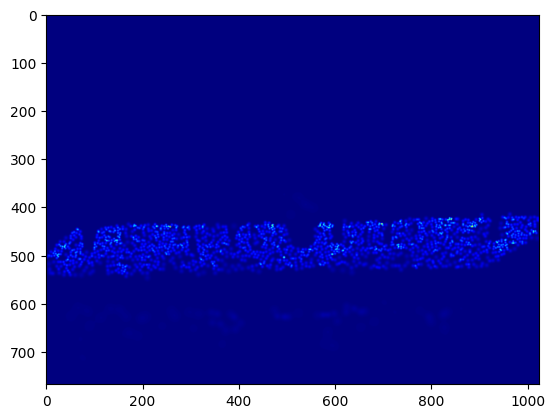

In [15]:
gt_file = h5py.File(img_paths[0].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [16]:
np.sum(groundtruth)

np.float32(1543.841)

In [18]:

path_sets = [part_B_train,part_B_test]
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
        
# creating density map for part_b images

for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

part_B_final/train_data\images\IMG_1.jpg
(768, 1024)
generate density...


C:\Users\abhishekgupta.AD\AppData\Local\Temp\ipykernel_22516\4212836471.py:24: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')


done.
part_B_final/train_data\images\IMG_2.jpg
(768, 1024)
generate density...
done.
part_B_final/train_data\images\IMG_3.jpg
(768, 1024)
generate density...
done.
part_B_final/train_data\images\IMG_4.jpg
(768, 1024)
generate density...
done.
part_B_final/train_data\images\IMG_5.jpg
(768, 1024)
generate density...
done.
part_B_final/test_data\images\IMG_1.jpg
(768, 1024)
generate density...
done.
part_B_final/test_data\images\IMG_2.jpg
(768, 1024)
generate density...
done.
part_B_final/test_data\images\IMG_3.jpg
(768, 1024)
generate density...
done.
part_B_final/test_data\images\IMG_4.jpg
(768, 1024)
generate density...
done.
part_B_final/test_data\images\IMG_5.jpg
(768, 1024)
generate density...
done.


In [20]:
#importing libraries
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [21]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                      transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]),
                  ])

In [22]:
#defining the location of dataset
root = '/home/pulkit/CSRNet/ShanghaiTech/CSRNet-pytorch/'
part_A_train = os.path.join(root,'part_A/train_data','images')
part_A_test = os.path.join(root,'part_A/test_data','images')
part_B_train = os.path.join(root,'part_B/train_data','images')
part_B_test = os.path.join(root,'part_B/test_data','images')
path_sets = [part_A_test]

In [33]:
img_paths

[]

In [34]:
mae = 0
for i in tqdm(range(len(img_paths))):
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
print (mae/len(img_path))

0it [00:00, ?it/s]

0.0


In [49]:
model = model.cpu()
model.eval()

mae = 0
with torch.no_grad():
    for i in tqdm(range(len(img_paths))):
        img = transform(Image.open(img_paths[i]).convert('RGB'))
        with h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'), 'r') as gt_file:
            groundtruth = np.asarray(gt_file['density'])
        output = model(img.unsqueeze(0))
        mae += abs(output.detach().numpy().sum() - groundtruth.sum())
print(mae/len(img_path))

0it [00:00, ?it/s]

0.0


Predicted Count :  -3


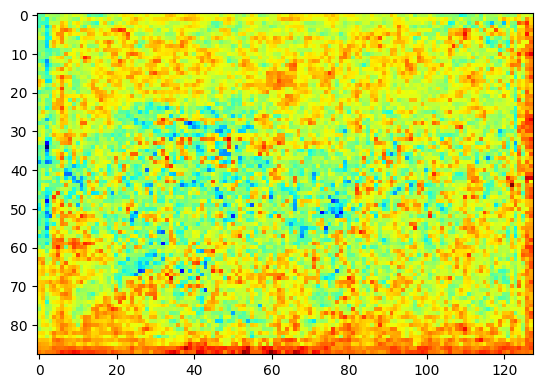

Original Count :  172


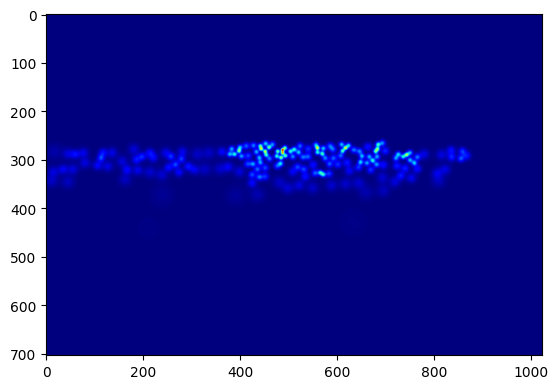

Original Image


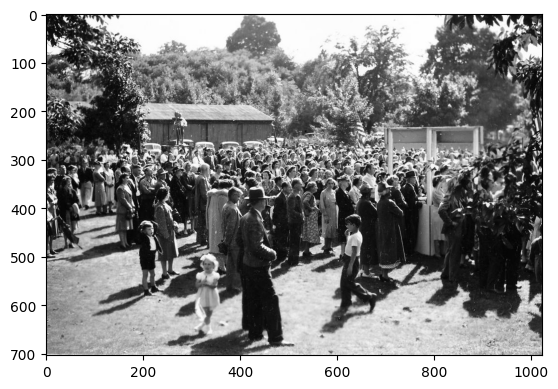

In [50]:
from matplotlib import cm as c
img = transform(Image.open('part_A_final/test_data/images/IMG_1.jpg').convert('RGB')).cpu()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('part_A_final/test_data/ground_truth/IMG_1.h5','r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('part_A_final/test_data/images/IMG_1.jpg'))
plt.show()